## 2D Steady State Heat Conduction
### Background
A short, handwavy explanation of how this works.

2D Steady State Heat Equation
$$\frac{\partial T}{\partial t}=\alpha\left ( \frac{\partial ^2T}{\partial x^2} + \frac{\partial ^2T}{\partial y^2}\right )= 0$$

Given a uniformly spaced _m_ x _n_ grid with no internal heat generation, the above equation can be approximated as:
$$T_{m,n}=\frac{1}{4}\left ( T_{m-1,n} + T_{m+1,n} + T_{m,n-1} + T_{m,n+1} \right )$$

Essentially, the temperature at each point is the average of the surrounding points. Each iteration will increase the accuracy of the solution.

In [60]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
%matplotlib notebook

In [61]:
def animate(i):
    """
    Clear current axis object and draw current temperature field  
    """
    ax.clear()
    plt.contourf(plate.grids[i], 12, cmap='jet')
    ax.set_title('n = %d' % (i+1,))

    # i == 0 seems to happen twice, so add colorbar when i == 1
    if i == 1:
        plt.colorbar(label='Temperature')

In [62]:
# Container for 2D plate
class Plate:

    import numpy as np
    
    def __init__(self, **kwargs):

        self.grids = []

        self.iterations = kwargs['iter']
        
        # Define plate size
        self.xmax = kwargs['xmax']  # Number of points in X
        self.ymax = kwargs['ymax']  # Number of points in Y

        # Define temperature boundary conditions
        self.top = kwargs['top']  # Top boundary temperature
        self.bottom = kwargs['bottom']  # Bottom  boundary temperature
        self.left = kwargs['left']  # Left boundary temperature
        self.right = kwargs['right']  # Right boundary temperature

        # Set initial conditions
        self.initial_temp = kwargs['initial_temp']
        self.grid = self.np.zeros((self.xmax, self.ymax)) + self.initial_temp

        
    def solve(self):
        """
        Compute the steady-state temperature distribution of the plate.
        Finite-Difference Formulation of Differential Equation
        """

        import time

        # Manually set boundary temperatures
        self.grid[0, :] = self.top
        self.grid[-1, :] = self.bottom
        self.grid[:, 0] = self.left
        self.grid[:, -1] = self.right

        start = time.time()
        
        # Take the average temperature of each node's neighbors. More iterations = more accurate solution
        # Vectorized for faster computation time
        for n in range(self.iterations):
            self.grid[1:-1, 1:-1] = 0.25*(self.grid[:-2, 1:-1] + self.grid[2:, 1:-1] + self.grid[1:-1, :-2] + self.grid[1:-1, 2:])
            #print(self.grid)
            
            # Create a copy of each iteration and flip so results are displayed correctly
            self.grids.append(self.np.flip(self.grid.copy(), axis=0))  

        # Manually calculate the temperature at the corners
        self.grid[0, 0] = 0.5 * (self.grid[1, 0] + self.grid[0, 1])  # Upper left
        self.grid[-1, 0] = 0.5 * (self.grid[-2, 0] + self.grid[-1, 1])  # Lower left
        self.grid[0, -1] = 0.5 * (self.grid[0, -2] + self.grid[1, -1])  # Upper right
        self.grid[-1, -1] = 0.5 * (self.grid[-1, -2] + self.grid[-2, -1])  # Lower right

        end = time.time() - start

        # Look at the difference between the last iteration and the second to last iteration
        max_diff = self.np.max(self.grids[-2] - self.grids[-1])
        
        return (end, max_diff)

Let's look at a small number of iterations:

Maximum temperature difference: 0.46875


<IPython.core.display.Javascript object>


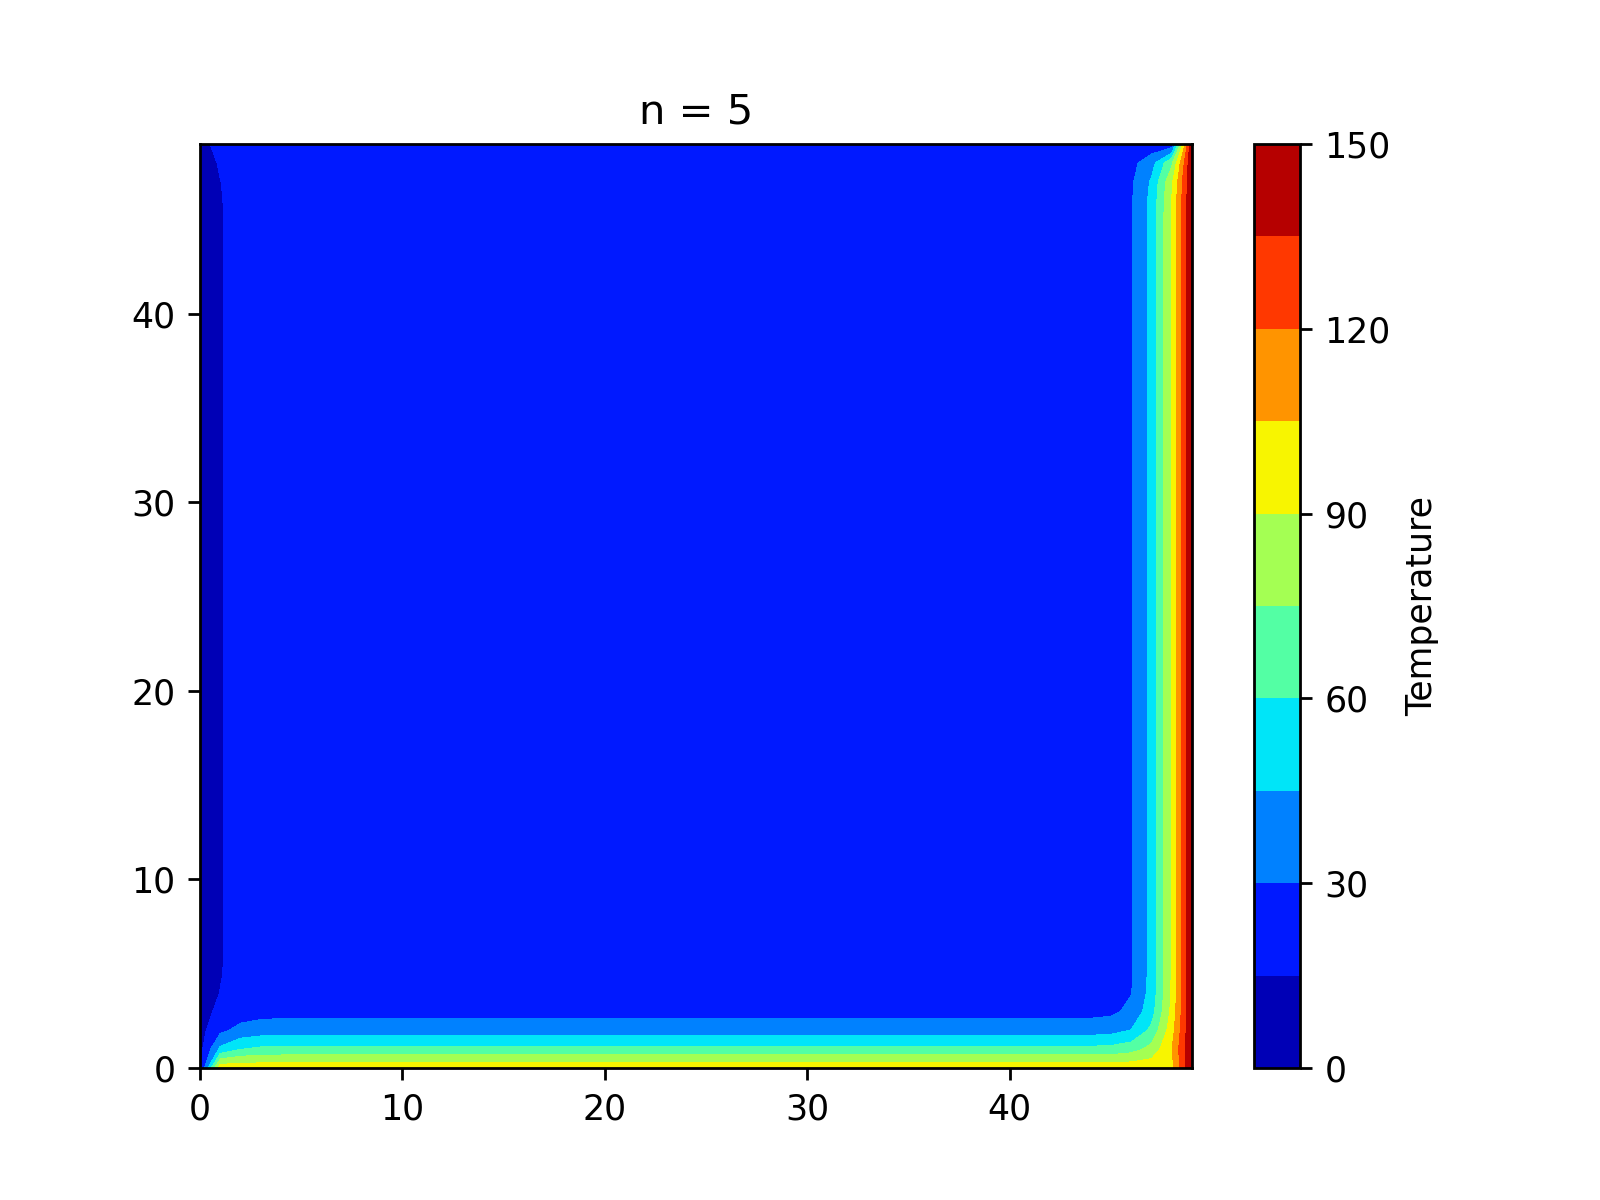

In [77]:
global niterations; niterations = []
global temperature_diff; temperature_diff = []
global plate_params; plate_params = {'xmax': 50, 'ymax': 50, 'top': 20, 
                                     'bottom': 100, 'left': 10, 'right': 150, 'initial_temp': 20}

# Number of solver iterations. More iterations = more accurate
iterations = 5
ani_interval = 100  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(**plate_params, iter=iterations)
temp_time, temp_diff = plate.solve()

print('Maximum temperature difference: {temperature}'.format(temperature=temp_diff))

# Store iteration and max difference data
niterations.append(iterations)
temperature_diff.append(temp_diff)

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
ani
#plt.show()

The maximum difference between the 4th iteration and the 5th iteration is 0.49, suggesting that the solver has not converged yet. More iterations are required.

Maximum temperature difference: 0.04847332617239175


<IPython.core.display.Javascript object>


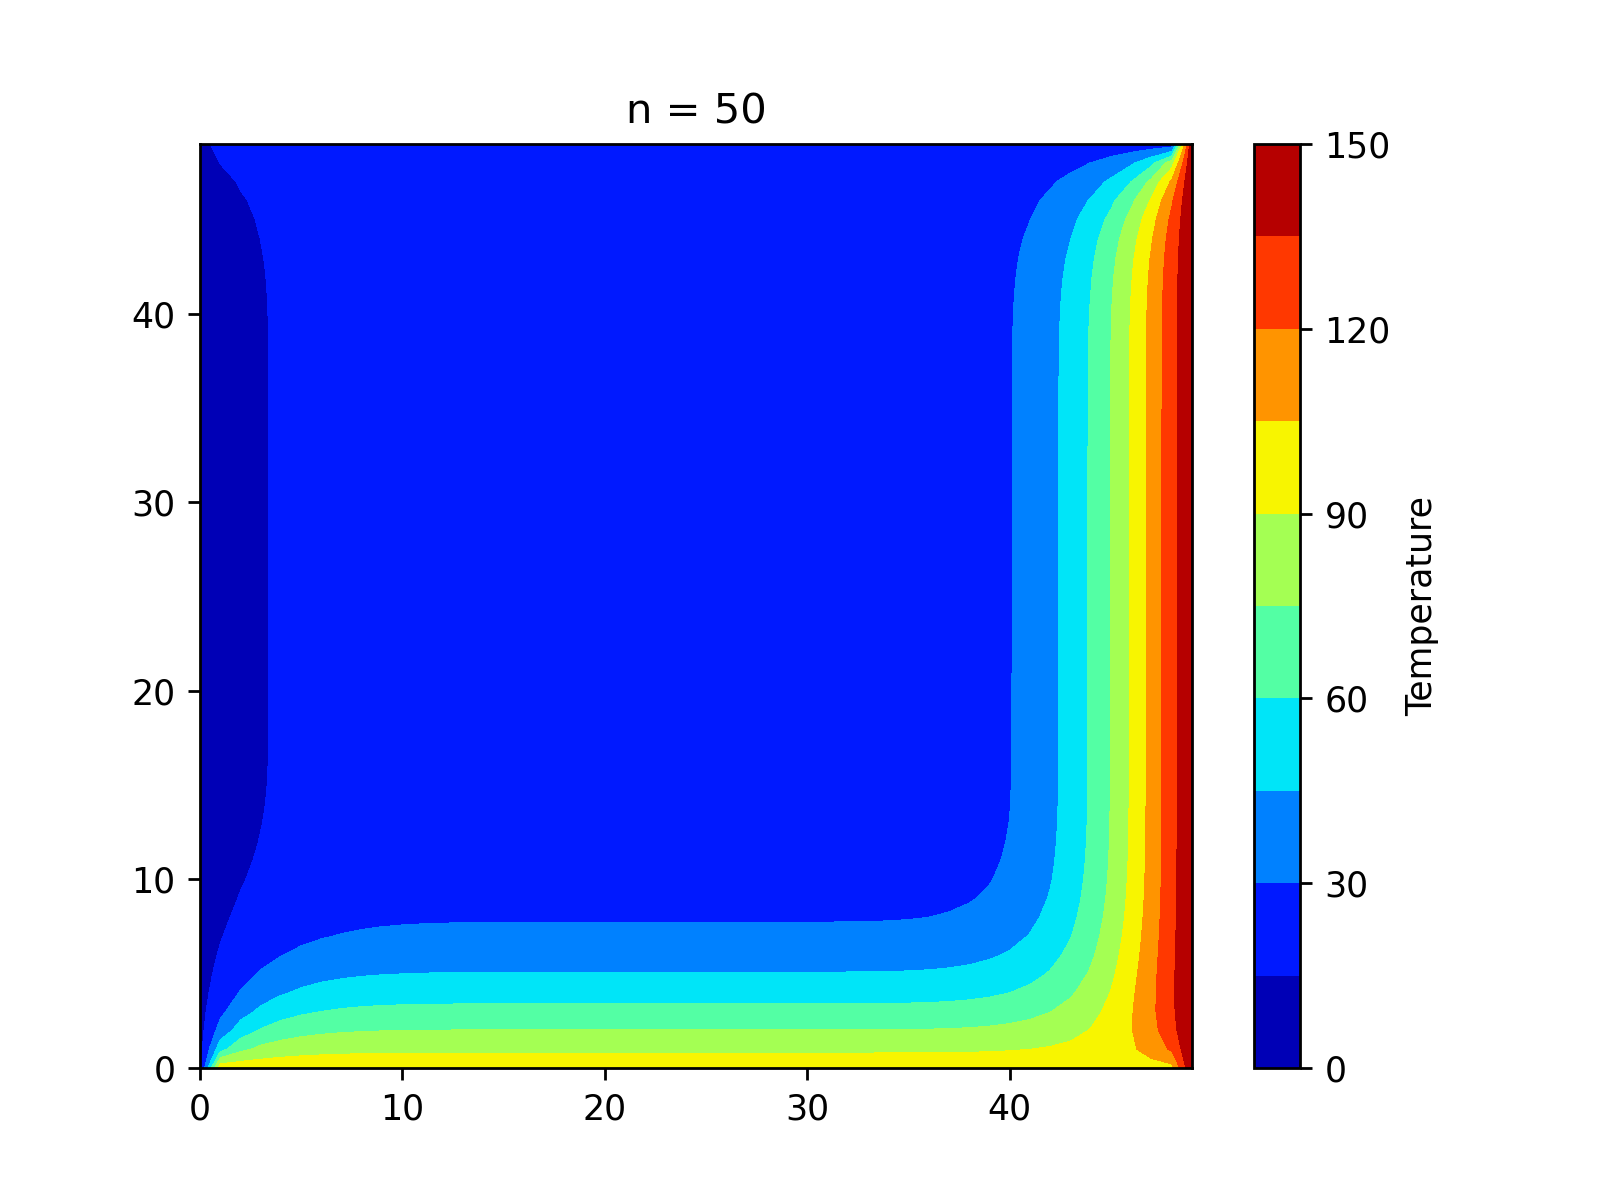

In [78]:
# Number of solver iterations. More iterations = more accurate
iterations = 50
ani_interval = 10  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(**plate_params, iter=iterations)
temp_time, temp_diff = plate.solve()

print('Maximum temperature difference: {temperature}'.format(temperature=temp_diff))

# Store iteration and max difference data
niterations.append(iterations)
temperature_diff.append(temp_diff)

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
ani
#plt.show()

Seeing a 0.05 temperature difference suggests some convergence, but let's try a few more:

Maximum temperature difference: 0.023925433757341352


<IPython.core.display.Javascript object>


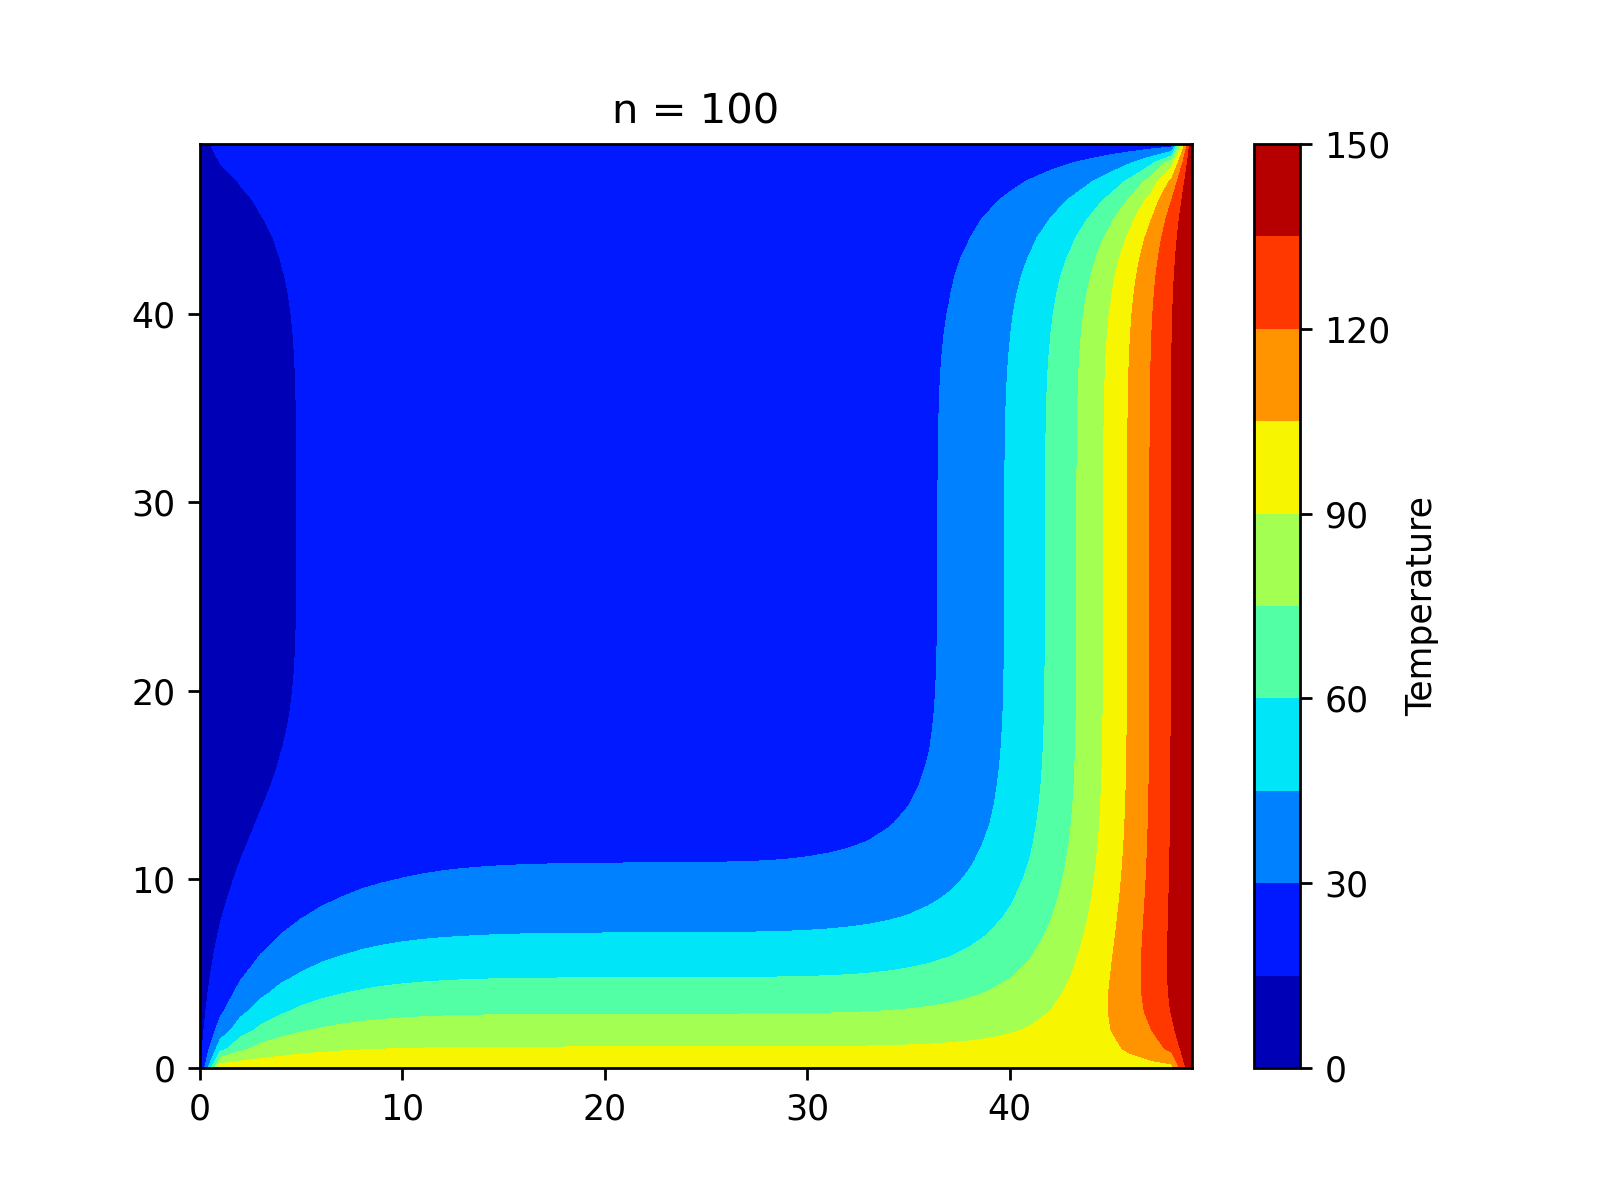

In [79]:
# Number of solver iterations. More iterations = more accurate
iterations = 100
ani_interval = 1  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(**plate_params, iter=iterations)
temp_time, temp_diff = plate.solve()

print('Maximum temperature difference: {temperature}'.format(temperature=temp_diff))

# Store iteration and max difference data
niterations.append(iterations)
temperature_diff.append(temp_diff)

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
ani
#plt.show()

Maximum temperature difference: 0.001905389840928251


<IPython.core.display.Javascript object>


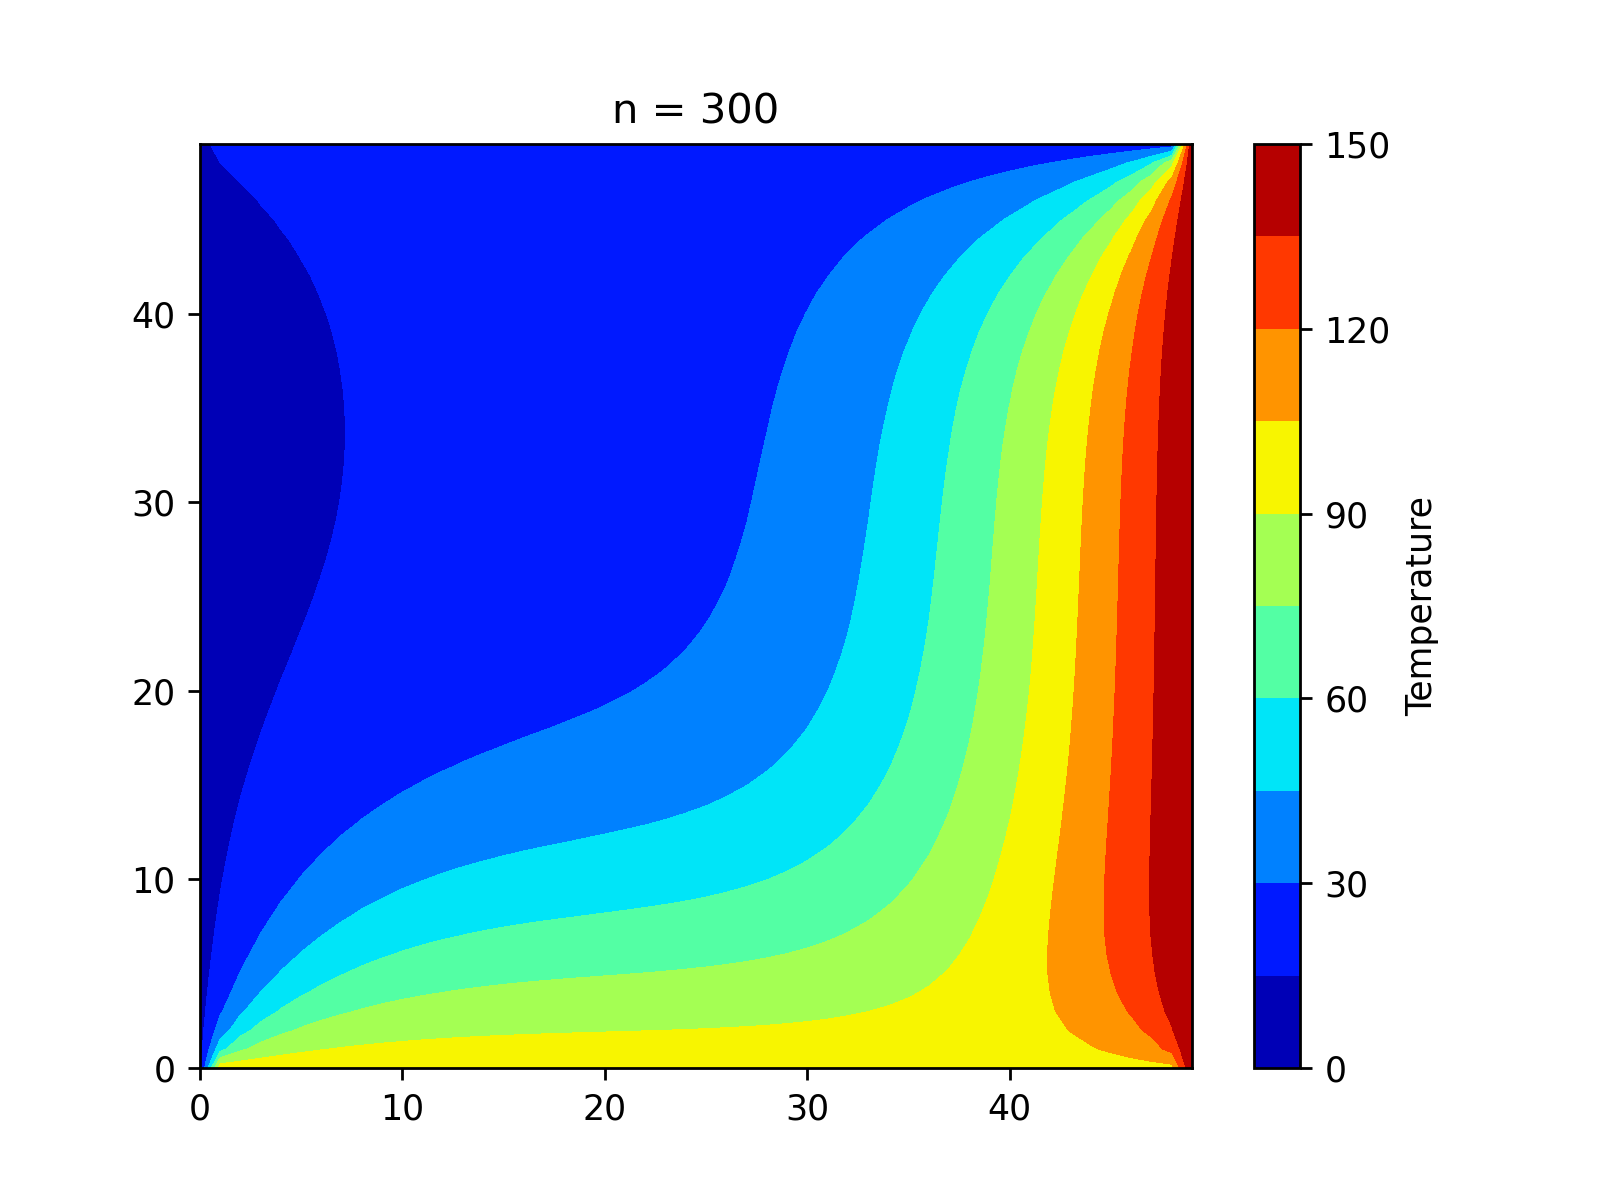

In [85]:
# Number of solver iterations. More iterations = more accurate
iterations = 300
ani_interval = 1  # Delay between each frame (milliseconds)

# Create instance of plate and calculate temperature field
plate = Plate(**plate_params, iter=iterations)
temp_time, temp_diff = plate.solve()

print('Maximum temperature difference: {temperature}'.format(temperature=temp_diff))

# Store iteration and max difference data
niterations.append(iterations)
temperature_diff.append(temp_diff)

# Plot and animate
fig, ax = plt.subplots()
ani = animation.FuncAnimation(fig, animate, iterations, interval=ani_interval, blit=False, repeat=False)
ani
#plt.show()

We seem to have converged on a solution--the maximum temperature difference is approaching zero, meaning that more iterations will not appreciably change the solution.

<IPython.core.display.Javascript object>


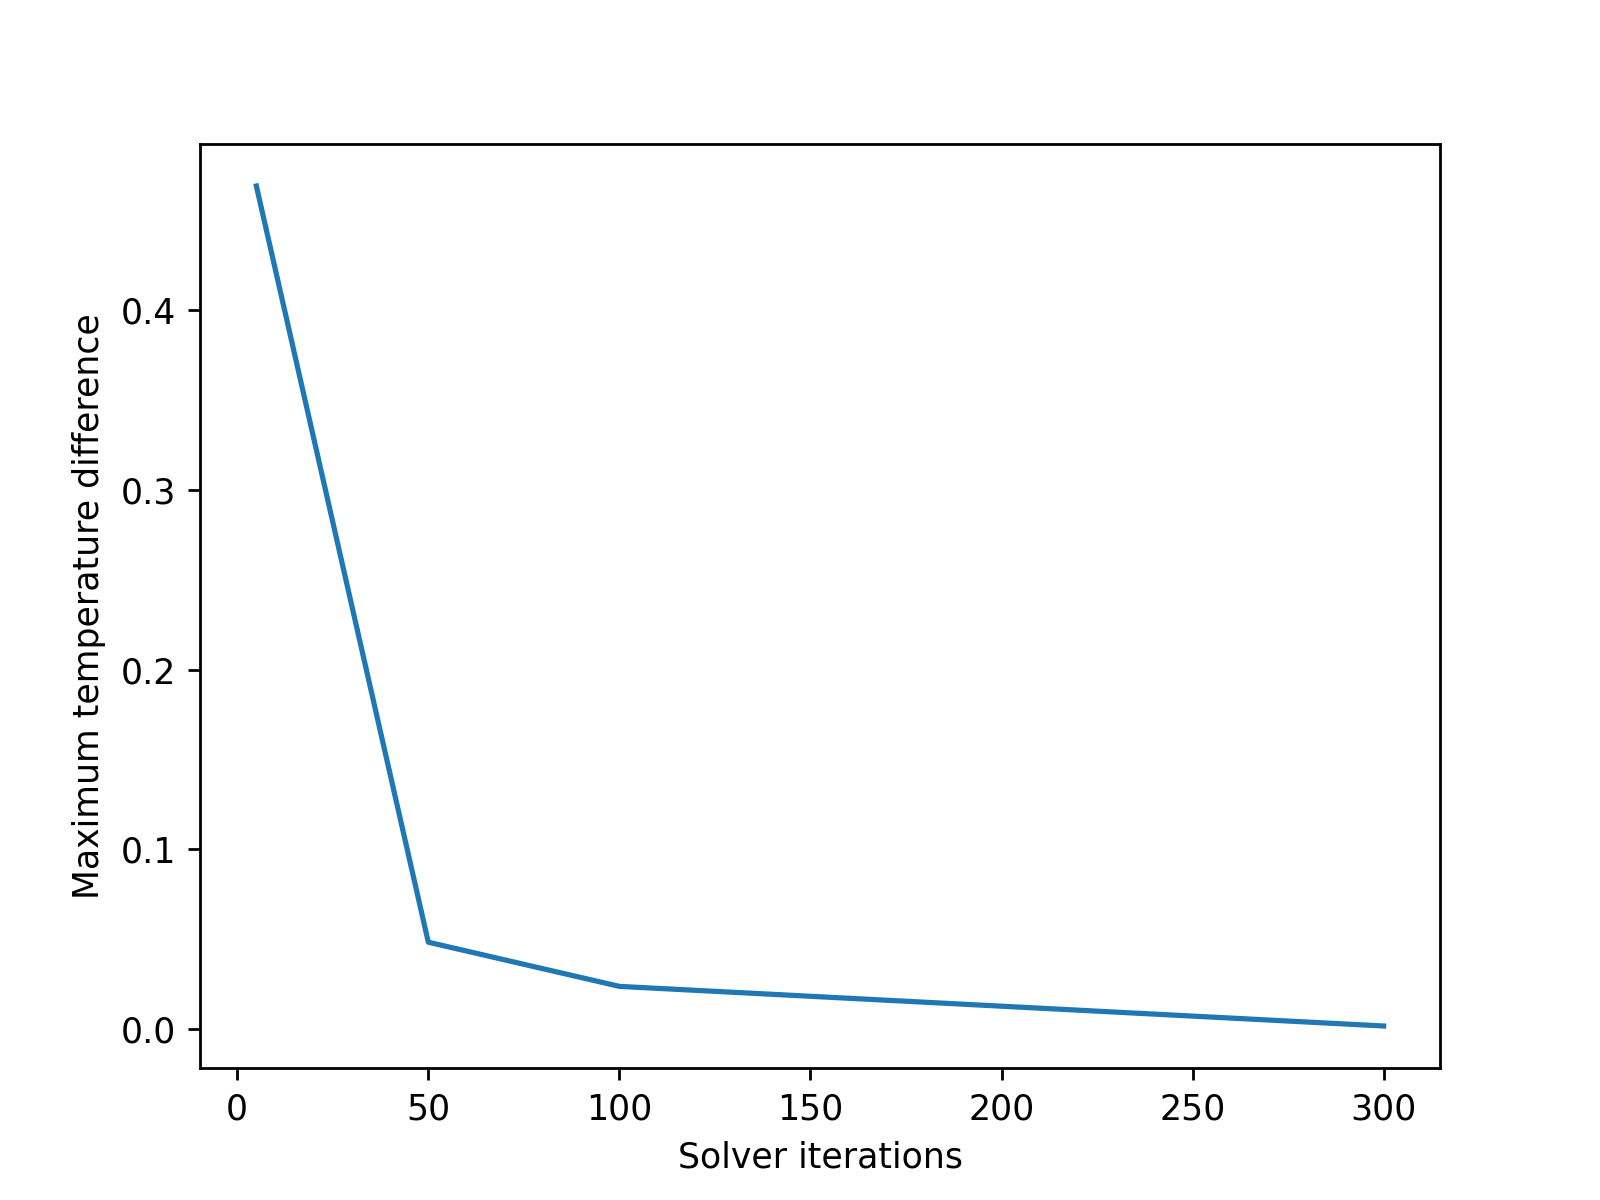

In [84]:
fig, ax = plt.subplots()
ax.plot(niterations, temperature_diff)
plt.xlabel('Solver iterations')
plt.ylabel('Maximum temperature difference')
plt.show()

Another way to check accuracy is against a commerical solver, like COMSOL. As you can see below, the results are very close to the n=300 example.

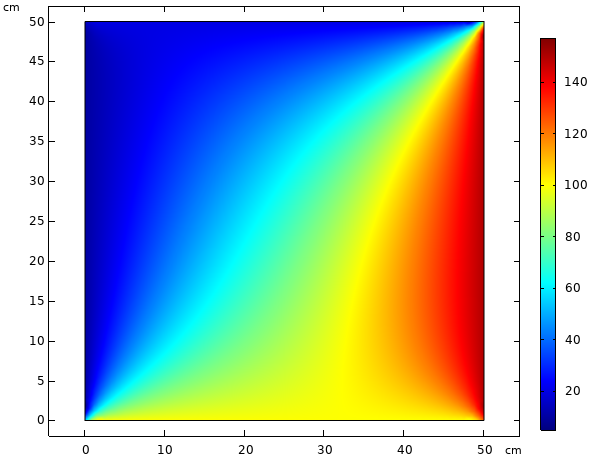

In [87]:
from IPython.display import Image
Image(filename='comsol.png')